<a href="https://colab.research.google.com/github/thienbaodzt/AI-1/blob/main/FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [6]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/FOOD', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 167 images belonging to 10 classes.


In [9]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
6/6 [==============================] - 32s 6s/step - loss: 0.6317 - accuracy: 0.8084
Epoch 2/20
6/6 [==============================] - 23s 4s/step - loss: 0.5544 - accuracy: 0.8263
Epoch 3/20
6/6 [==============================] - 23s 4s/step - loss: 0.4360 - accuracy: 0.8623
Epoch 4/20
6/6 [==============================] - 30s 5s/step - loss: 0.3959 - accuracy: 0.8563
Epoch 5/20
6/6 [==============================] - 28s 4s/step - loss: 0.3628 - accuracy: 0.8982
Epoch 6/20
6/6 [==============================] - 33s 6s/step - loss: 0.2984 - accuracy: 0.9162
Epoch 7/20
6/6 [==============================] - 25s 4s/step - loss: 0.2607 - accuracy: 0.9102
Epoch 8/20
6/6 [==============================] - 23s 4s/step - loss: 0.2274 - accuracy: 0.9461
Epoch 9/20
6/6 [==============================] - 24s 4s/step - loss: 0.1807 - accuracy: 0.9281
Epoch 10/20
6/6 [==============================] - 24s 4s/step - loss: 0.1960 - accuracy: 0.9162
Epoch 11/20
6/6 [======================

In [10]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.01905360259115696
Do chinh xac 1.0


In [11]:
training_set.class_indices

{'banhcuon': 0,
 'banhgoi': 1,
 'banhmi': 2,
 'banhran': 3,
 'banhxeo': 4,
 'bunbo': 5,
 'buncha': 6,
 'bunoc': 7,
 'che': 8,
 'comtam': 9}

In [12]:
model.save('VD.h5')
model_CNN = load_model('VD.h5')

1/1 [==============================] - 0s 158ms/step


array([4])

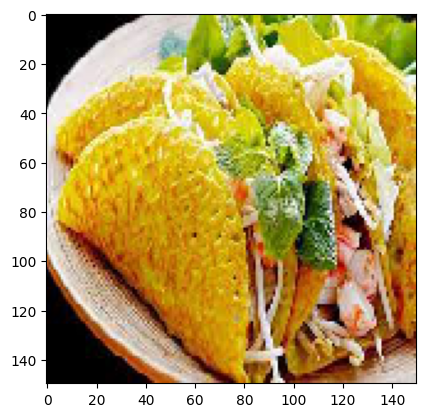

In [13]:
img = load_img('/content/drive/MyDrive/FOOD/banhxeo/1.jpg', target_size = (150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model_CNN.predict(img), axis = 1)